## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print(df.shape)
print(df.info())
df.describe()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(classes)

Class
0    284315
1       492
Name: count, dtype: int64


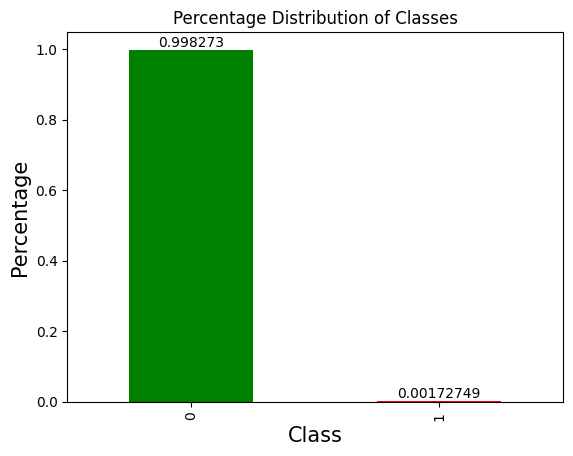

In [5]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['green', 'red'])
ax.bar_label(ax.containers[0])

plt.title('Percentage Distribution of Classes')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()

Text(0.5, 1, 'Time vs Class Distribution')

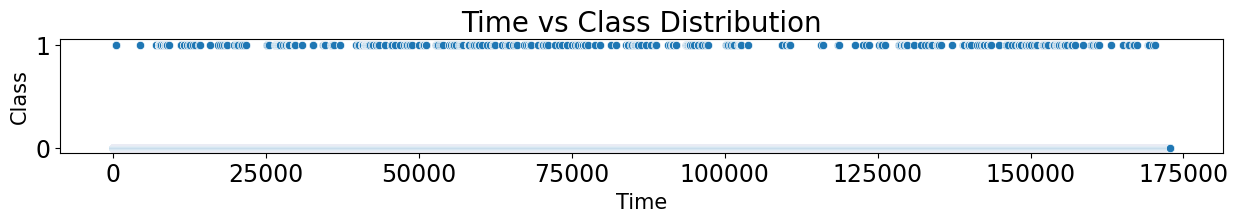

In [4]:
# Creating a scatter plot to observe the distribution of classes with time

Time_ = pd.to_timedelta(df['Time'], unit='s')

# Creating columns for Days,  Mins and Hours

df['Time_Day'] = (Time_.dt.components.days).astype(int)
df['Time_Hour'] = (Time_.dt.components.hours).astype(int)
df['Time_Min'] = (Time_.dt.components.minutes).astype(int)

fig = plt.figure(figsize=(15, 5))
cmap = sns.color_palette()


plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)

plt.xlabel('Time', size=15)
plt.ylabel('Class', size=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17) 
plt.title('Time vs Class Distribution', size=20, y=1)

Text(0.5, 1, 'Class Distribution w.r.t Amount')

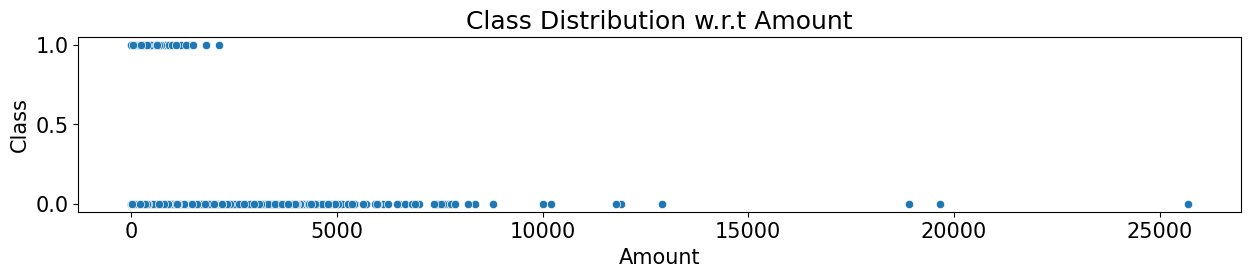

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount

fig = plt.figure(figsize=(15, 5))
cmap = sns.color_palette()

plt.subplot(2,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=15)
plt.ylabel('Class', size=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15) 
plt.title('Class Distribution w.r.t Amount', size=18, y=1)


In [5]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)

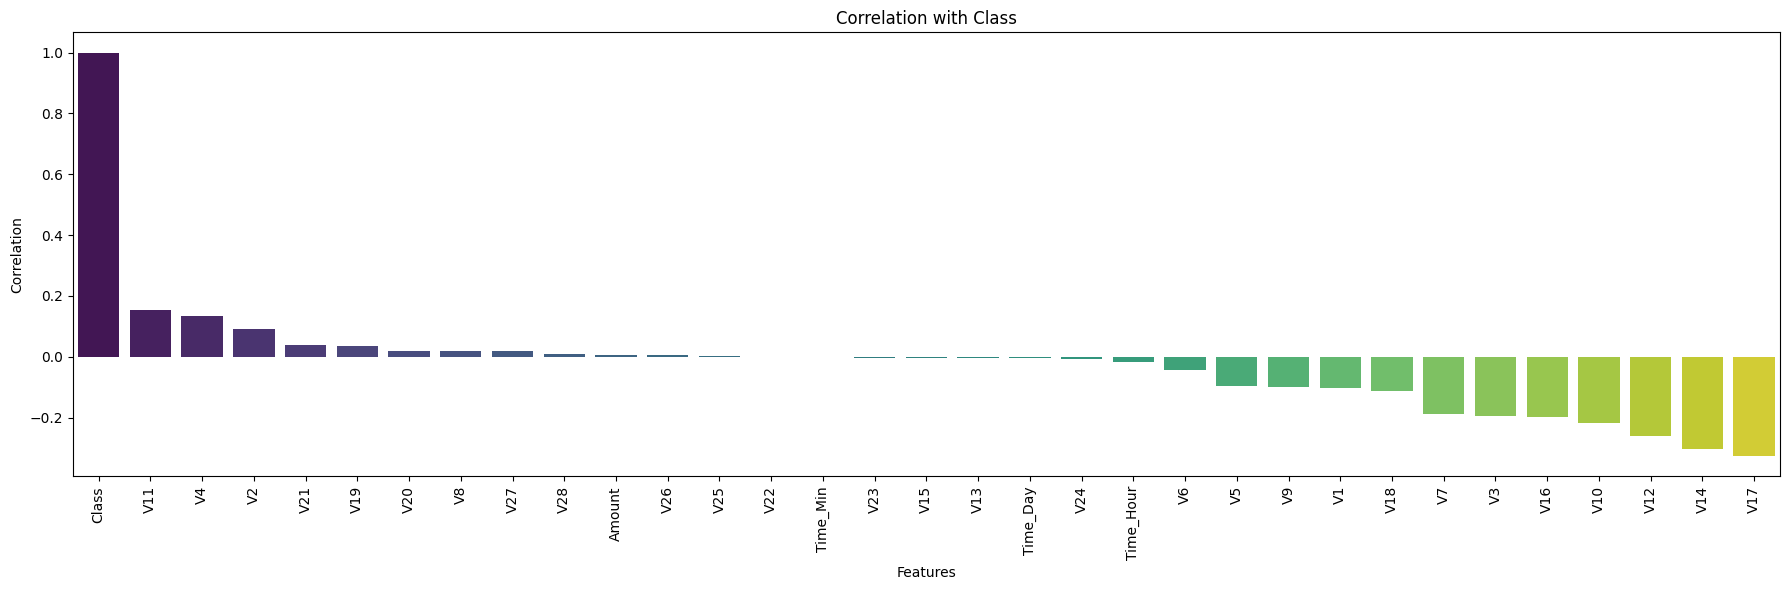

In [9]:
# Calculate correlations w.r.t target variable

correlations = df.corr()['Class'].sort_values(ascending=False)

# Create a bar plot for the correlations
plt.figure(figsize=(18, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f'Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

In [6]:
# Dropping Min & Day as only the hour is relevent
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [11]:
df.shape

(284807, 31)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


### Splitting the data into train & test data

In [7]:
X = df.drop(['Class'], axis=1)
y = df['Class'] #class variable

In [8]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify=y, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

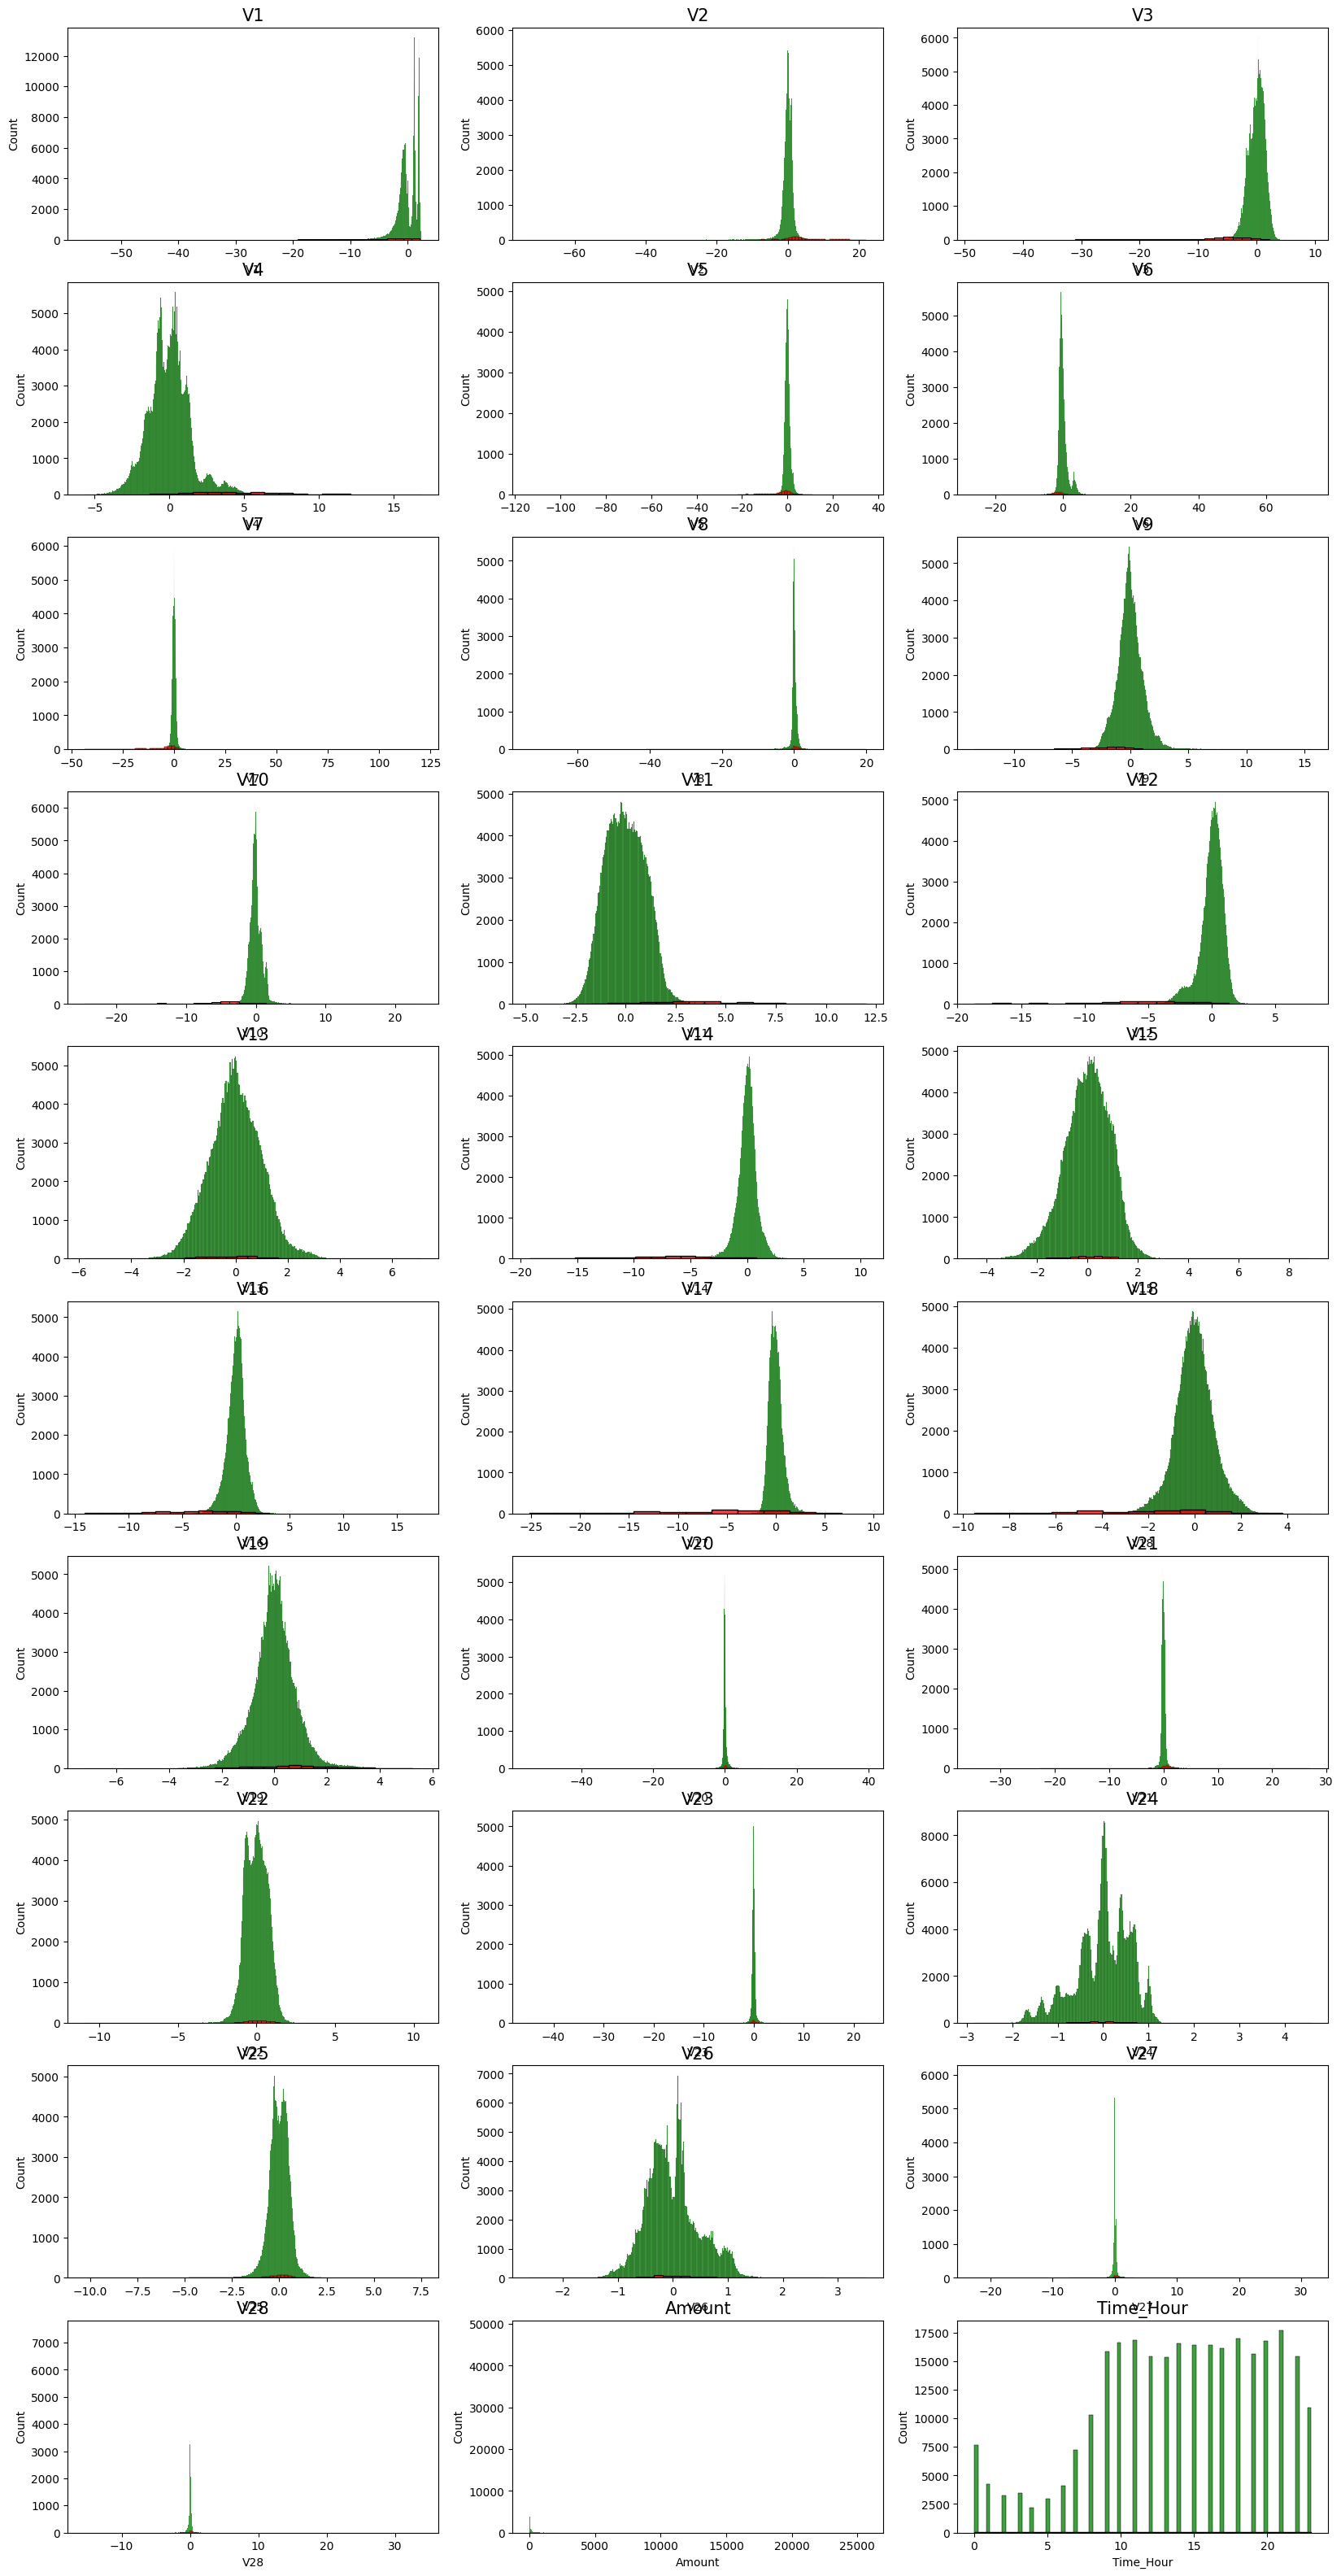

In [16]:
# plotting the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.histplot(X[col][normal_records], color='green')
  sns.histplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=15)
plt.show()


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# X_train

In [9]:
# - Applying preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
pt.fit_transform(X_train)                        
X_train_pt = pt.transform(X_train) 
X_test_pt = pt.transform(X_test)

X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

NameError: name 'cols' is not defined

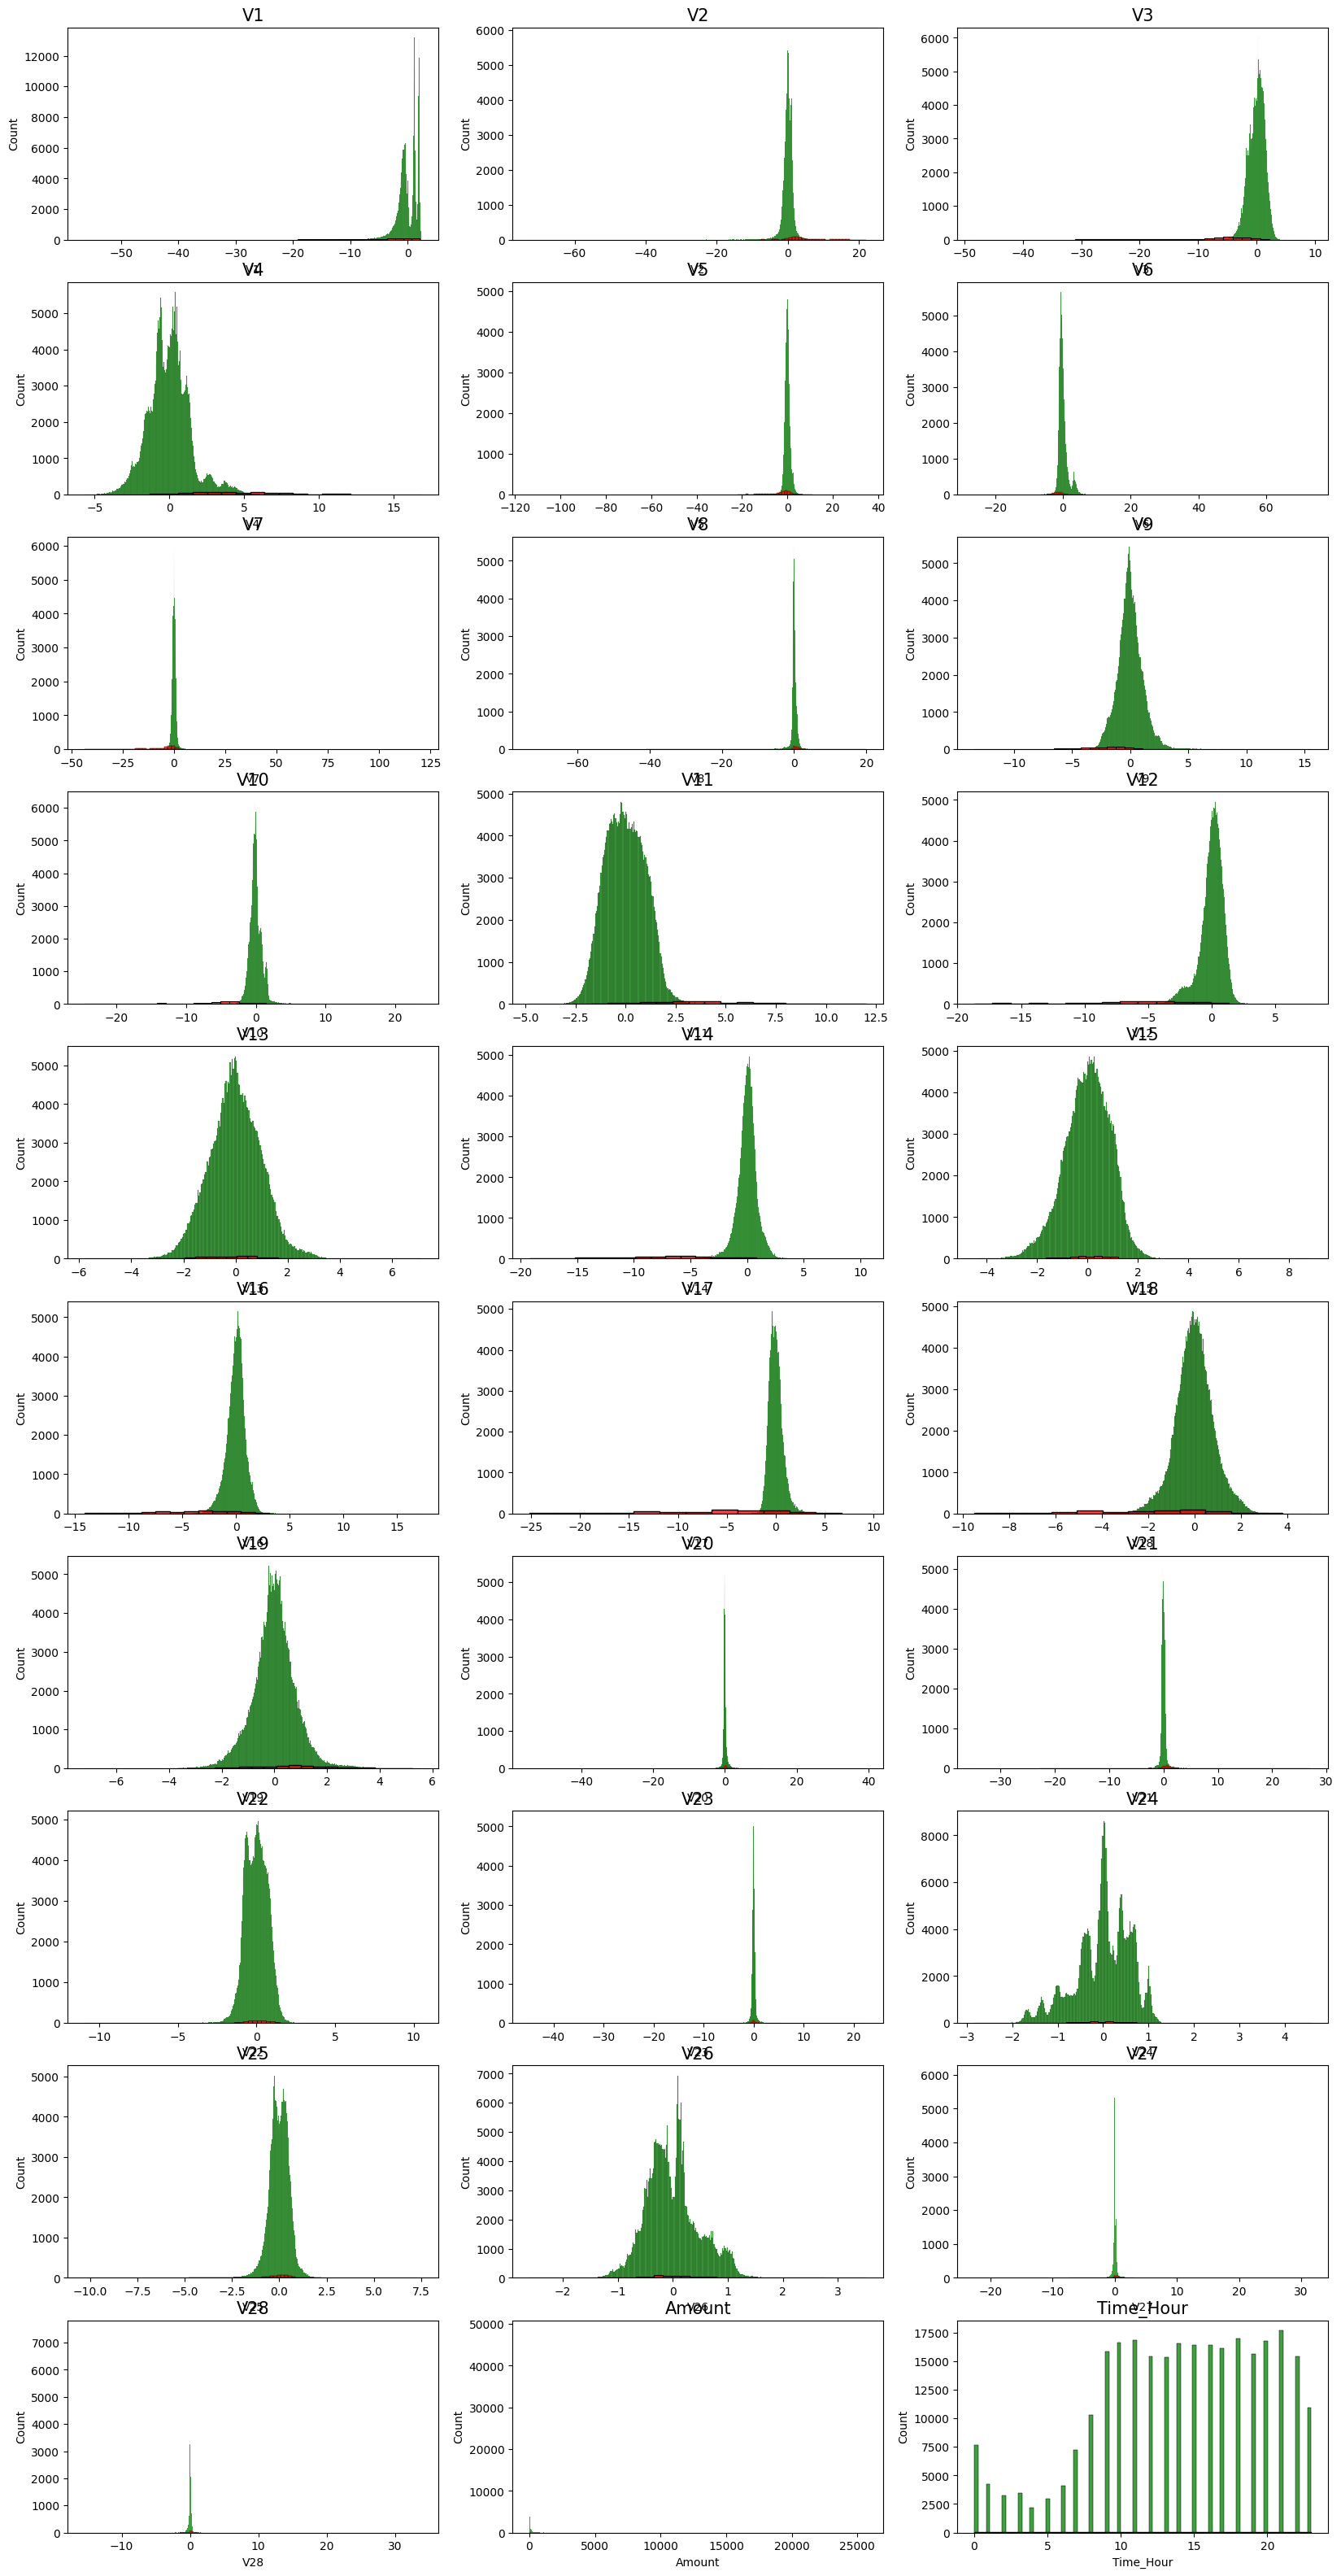

In [19]:
# plotting the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.histplot(X[col][normal_records], color='green')
  sns.histplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=15)
plt.show()



## Model Building
- Building different models on the imbalanced dataset and see the result

### The dataset had 284,807 datapoints, making SVM and Random Forest(for some cases) not tried for model building due to their computational power and time-consuming nature. SVM was not used due to the large number of data points and time required for hyperparameter tuning. KNN was not used due to its memory inefficiency and computational burden for calculating distance and finding nearest neighbors.

## Logistic Regression

In [15]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [16]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifing params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,) 

# Fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [17]:
# results of Grid Search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.054936,0.042080,0.023915,0.004369,0.01,{'C': 0.01},0.954836,0.965184,0.992148,0.964109,...,0.972191,0.013927,1,0.980486,0.969271,0.976551,0.975073,0.979623,0.976201,0.003987
1,1.880677,0.127789,0.023796,0.002157,0.10,{'C': 0.1},0.943782,0.957038,0.977924,0.945841,...,0.957972,0.012655,2,0.972540,0.954364,0.958032,0.958643,0.951899,0.959096,0.007159
2,1.947194,0.125625,0.024769,0.004915,1.00,{'C': 1},0.909522,0.958877,0.984428,0.939771,...,0.951206,0.025220,3,0.961084,0.962872,0.960931,0.956656,0.941002,0.956509,0.008018
3,1.978435,0.089075,0.024057,0.002823,10.00,{'C': 10},0.905212,0.946495,0.972756,0.937995,...,0.945669,0.023827,6,0.958022,0.941364,0.950415,0.955884,0.961937,0.953524,0.007129
4,1.950894,0.040770,0.022313,0.001897,100.00,{'C': 100},0.930914,0.957484,0.962276,0.931365,...,0.949076,0.014778,5,0.964666,0.958900,0.940838,0.954729,0.961123,0.956051,0.008262
5,1.922003,0.059312,0.023414,0.003264,1000.00,{'C': 1000},0.912874,0.959255,0.983466,0.930980,...,0.950324,0.025186,4,0.960876,0.957588,0.962211,0.949902,0.965214,0.959158,0.005236


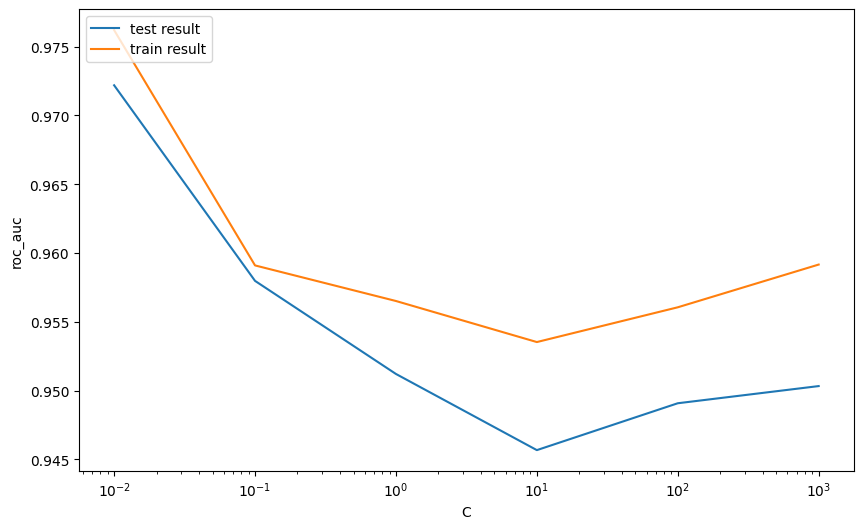

In [23]:
# plotting of C vs train and validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [18]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9721905341770372 at C = 0.01


### Logistic regression with optimal C

In [19]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### on the Train set (Logistic Regression)

In [20]:
# Instantiating the model with best C
logistic_imb = LogisticRegression(C=0.1)

# Fitting the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

# Crearting Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)


# Creating the Confusion matrix #
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[227409     42]
 [   126    268]]


In [27]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992626566306041
Sensitivity:- 0.6802030456852792
Specificity:- 0.9998153448435048
F1-Score:- 0.7613636363636364


In [28]:
# Generating the Classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.86      0.68      0.76       394

    accuracy                           1.00    227845
   macro avg       0.93      0.84      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [29]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

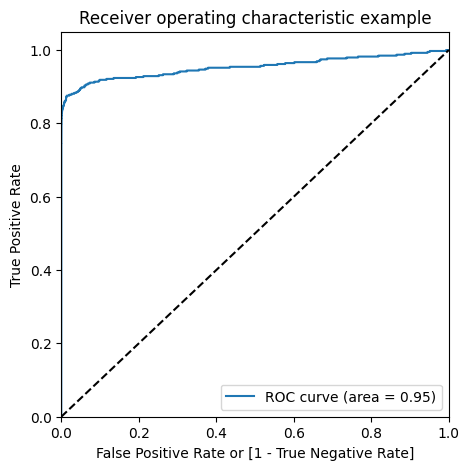

In [30]:
# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [31]:
# Excellent ROC

### on the Test set (Logistic Regression)

In [32]:
#logistic_imb_model = 
logistic_imb.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [33]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56851    13]
 [   38    60]]


In [34]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991046662687406
Sensitivity:- 0.6802030456852792
Specificity:- 0.9998153448435048
F1-Score:- 0.7017543859649122


In [35]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.61      0.70        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962



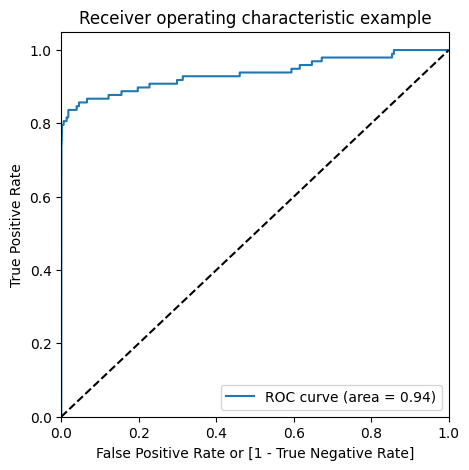

In [36]:
# ROC on Test
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Similarly explore other algorithms by building models like:
- XGBoost
- 
- Decision Tree
- Random Forest


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

## XGBoost

In [37]:
# ! pip install xgboost

In [38]:
# Importing XGBoost

from xgboost import XGBClassifier

In [39]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specifying the range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specifying the model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# setting up the  GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.148905,0.036981,0.153572,0.005209,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979457,0.981135,0.975752,0.978781,0.002249,4,0.999368,0.999790,0.999829,0.999662,0.000209
1,5.212396,0.040204,0.151594,0.005368,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.984699,0.987040,0.974288,0.982009,0.005543,2,0.999912,0.999892,0.999962,0.999922,0.000030
2,5.020529,0.013987,0.151590,0.004617,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.983330,0.980806,0.982962,0.982366,0.001114,1,0.999836,0.999927,0.999965,0.999909,0.000054
3,5.258979,0.030762,0.151066,0.001763,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979260,0.968308,0.968783,0.972117,0.005055,6,0.999801,0.999999,0.999998,0.999933,0.000093
4,5.293079,0.008715,0.149569,0.001486,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970757,0.975910,0.969785,0.972151,0.002688,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,5.132874,0.043851,0.148874,0.000940,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.983811,0.979515,0.982136,0.981821,0.001768,3,1.000000,1.000000,1.000000,1.000000,0.000000


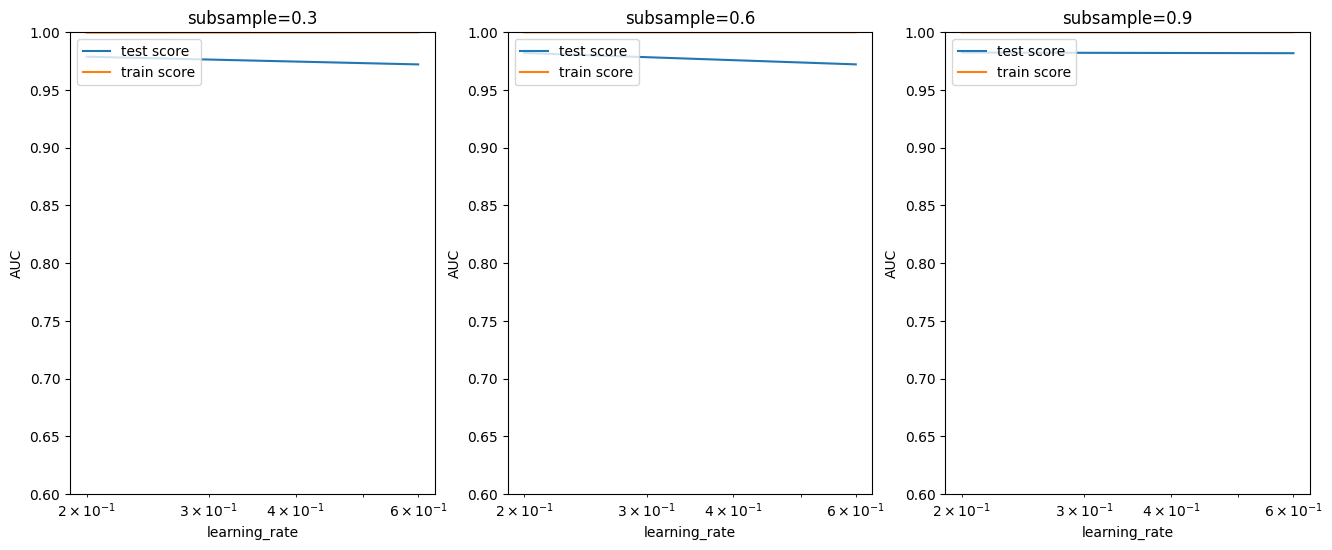

In [41]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [42]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [43]:
# chosen hyperparameters

# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

### on the Train set (xgboost)

In [44]:
y_train_pred = xgb_imb_model.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [45]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [46]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [47]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

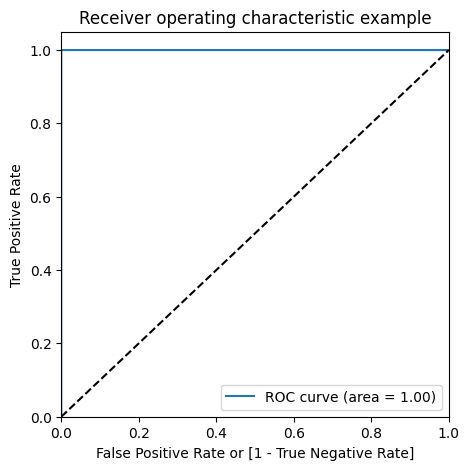

In [48]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

### on the test set (xgboost)


In [49]:
y_test_pred = xgb_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56862     2]
 [   23    75]]


In [50]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9995611109160493
Sensitivity:- 0.7653061224489796
Specificity:- 0.9999648283624085
F1-Score:- 0.8571428571428571


In [51]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9683728021315448

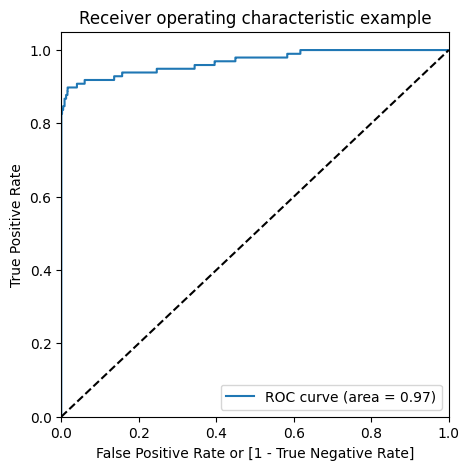

In [53]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           scoring= 'roc_auc')

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,13.506297,0.247230,0.082856,0.001226,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.941398,0.938148,0.930958,0.936835,0.004362,5
1,13.074960,0.232514,0.074182,0.003522,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.926258,0.938148,0.930960,0.931789,0.004889,8
2,13.285297,0.180393,0.072448,0.008799,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941259,0.949889,0.938812,0.943320,0.004751,2
3,13.241679,0.296856,0.074618,0.002887,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941259,0.949889,0.938812,0.943320,0.004751,2
4,25.853806,0.365045,0.070740,0.018477,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970424,0.945227,0.928566,0.948072,0.017206,1
5,77.015439,71.330804,0.082621,0.001076,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.970426,0.930076,0.920985,0.940496,0.021487,4
6,26.593013,0.054547,0.082920,0.024758,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932013,0.912980,0.950820,0.931938,0.015448,7
7,26.566007,0.106781,0.080375,0.011413,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932022,0.920416,0.943392,0.931943,0.009380,6


In [57]:
# Printing the hyperparameters and optimal sensitivity score 
print("Best roc AUC:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc AUC:- 0.9480723447754045
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [58]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

### on the Train set (Decision Tree)

In [59]:
y_train_pred = dt_imb_model.predict(X_train)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999113432377274
Sensitivity:- 0.7653061224489796
Specificity:- 0.9999648283624085
F1-Score:- 0.7299465240641712


In [60]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.69      0.73       394

    accuracy                           1.00    227845
   macro avg       0.89      0.85      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [61]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9825539821183553

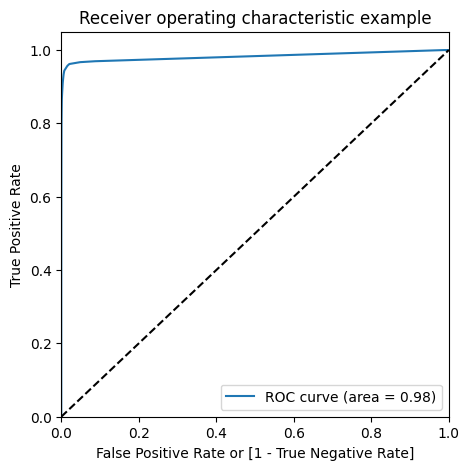

In [62]:
# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)


### on the Test set (Decision Tree)

In [63]:
y_test_pred = dt_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56835    29]
 [   30    68]]


In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989642217618764
Sensitivity:- 0.6938775510204082
Specificity:- 0.999490011254924
F1-Score:- 0.7299465240641712


In [65]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [66]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9314425826605263

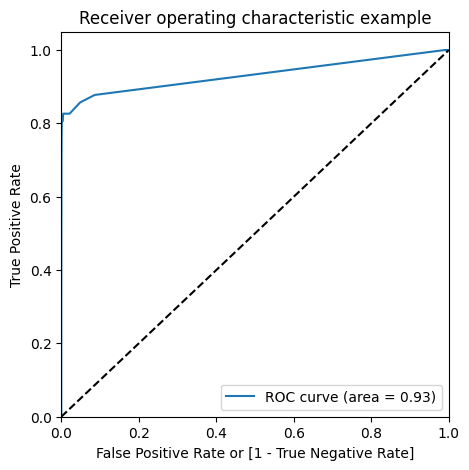

In [67]:
# Plot the ROC curve Test set (Decision Tree)
draw_roc(y_test, y_test_pred_proba)

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Creating a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fitting the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [70]:
# printing the optimal Accuracy Score and Hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992187671828412 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [71]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100, n_jobs=-1)

In [72]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_jobs=-1)

### on Train set (random forest)

In [73]:

y_train_pred = rfc_imb_model.predict(X_train)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992670455792315
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7758389261744967


In [75]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.73      0.78       394

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [76]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9792637269538972

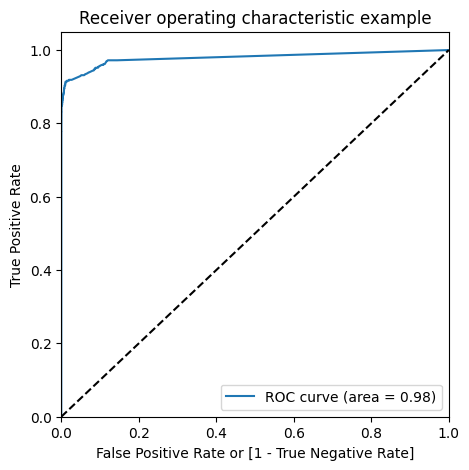

In [77]:
# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

### on Test (random forest)

In [78]:
y_test_pred = rfc_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56843    21]
 [   29    69]]


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9495979775991011
Sensitivity:- 0.8877551020408163
Specificity:- 0.9497045582442318
F1-Score:- 0.05714285714285714


In [80]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.70      0.73        98

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9466607760155272

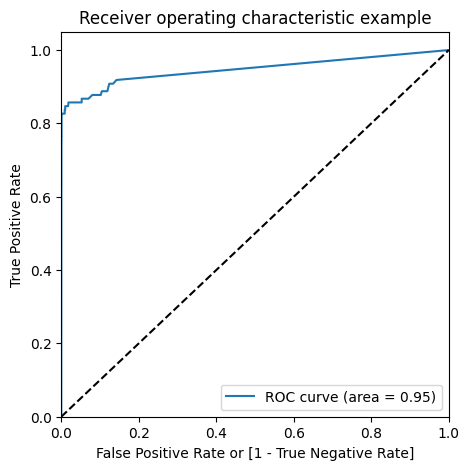

In [82]:
# Plot the ROC curve Test (random forest)
draw_roc(y_test, y_test_pred_proba)

## Printing the important features of the best model to understand the dataset


Best Model = 

In [83]:
clf = xgb_imb_model

Top var = 14
2nd Top var = 7
3rd Top var = 10


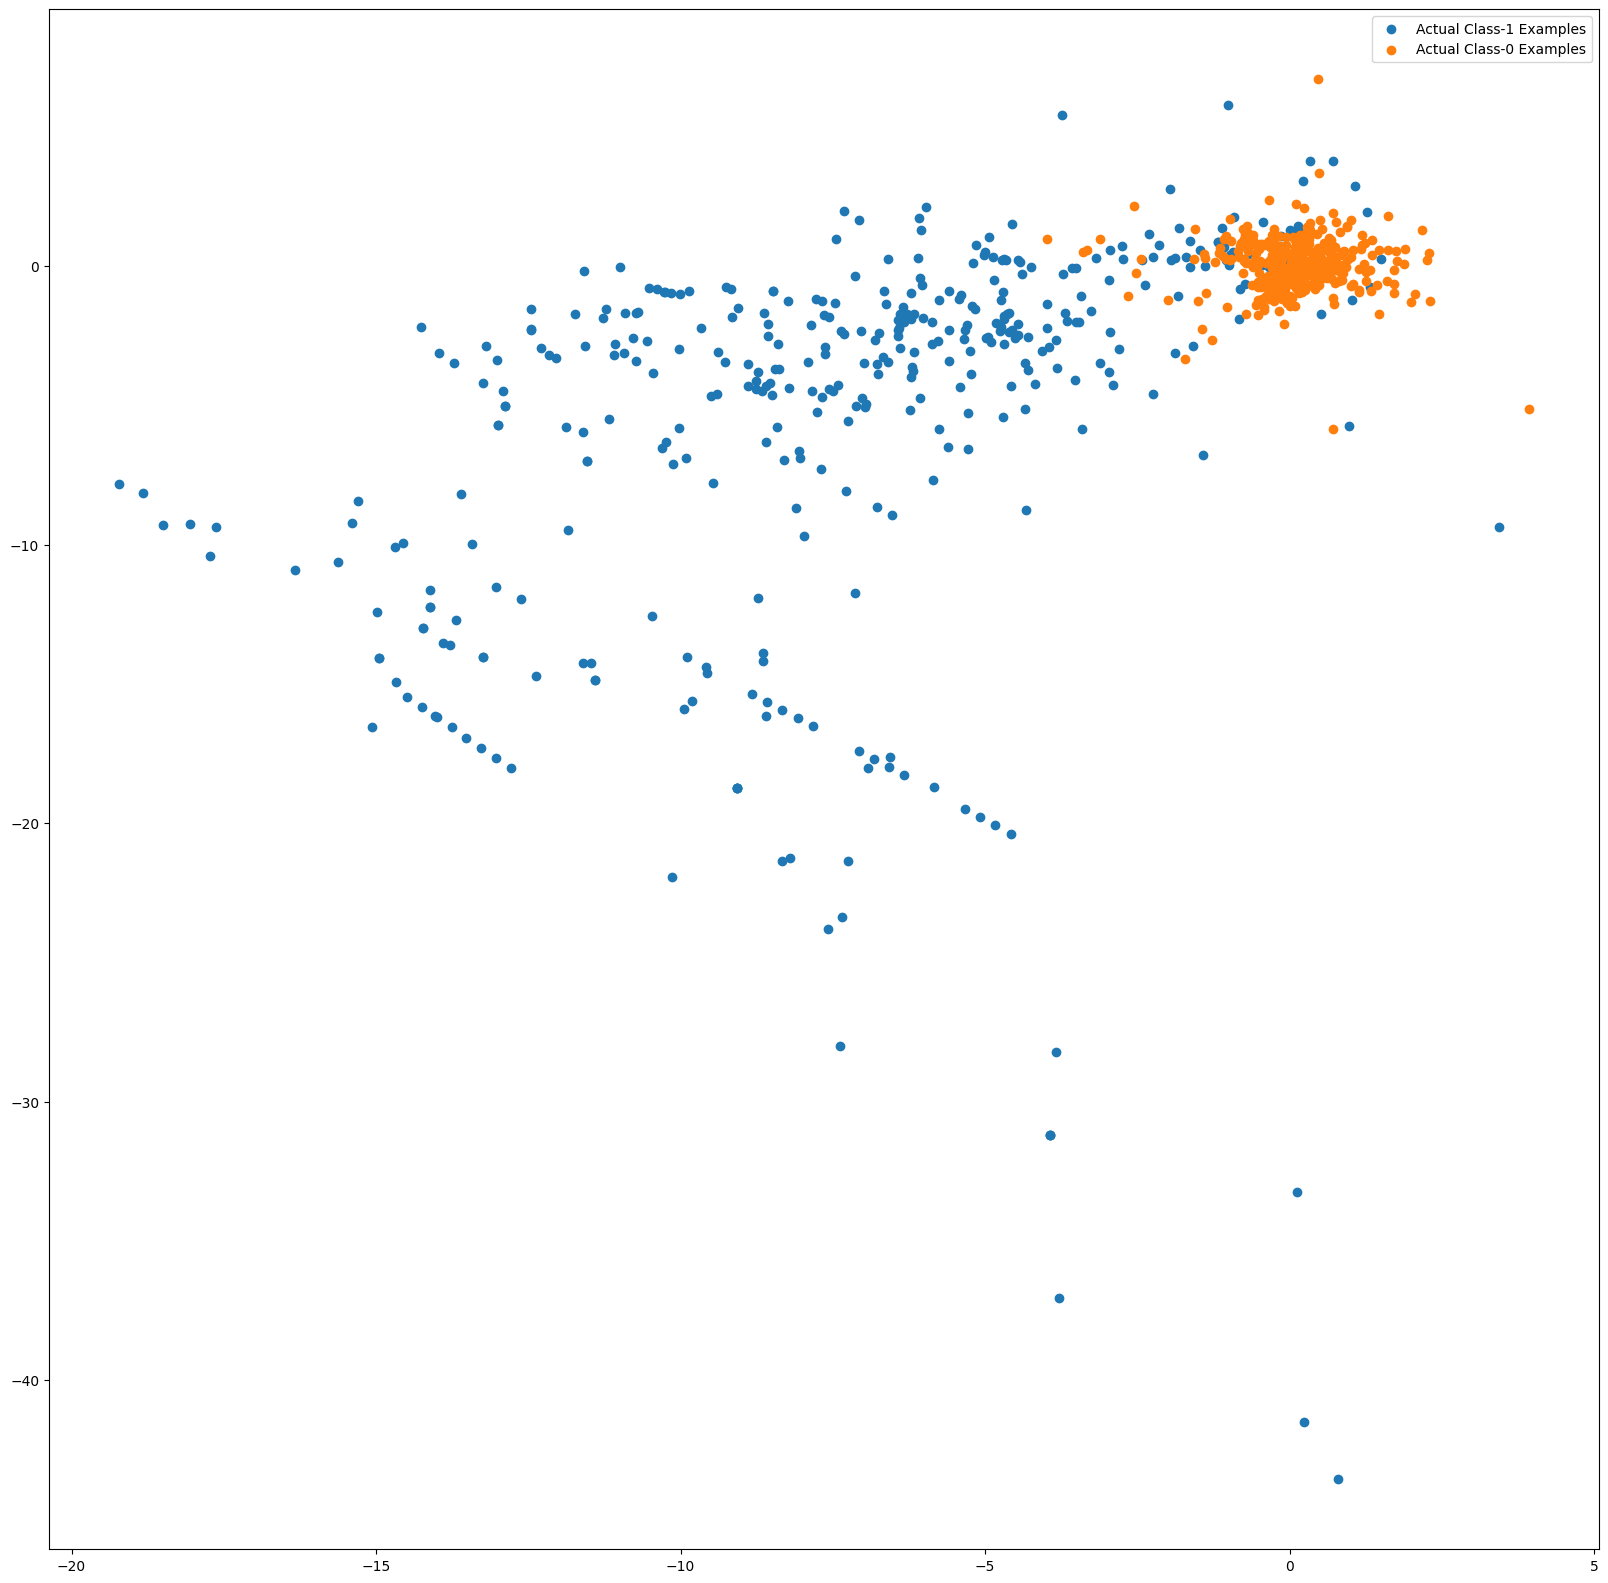

In [84]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN
  

*
When working with imbalanced datasets, SMOTE (Synthetic Minority Oversampling Technique) is thought to be superior to random oversampling because it creates new synthetic data points based on preexisting minority class samples.
This contributes to the dataset's diversity and information. 
Random oversampling, on the other hand, merely replicates preexisting minority samples, which may result in overfitting problems. 

#### hence not considering using Random Oversampling

## Model Building
- Build different models on the balanced dataset and see the result

### SMOTE (Synthetic Minority Oversampling Technique)

In [21]:
# installing libraries
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling

# instantiating SMOTE
sm = SMOTE(random_state=0)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# printing values before and after
print('Before the SMOTE oversampling X_train shape=',X_train.shape)
print('After the SMOTE oversampling X_train shape=',X_train_smote.shape)

Before the SMOTE oversampling X_train shape= (227845, 30)
After the SMOTE oversampling X_train shape= (454902, 30)


### Printing the class distribution after applying SMOTE 

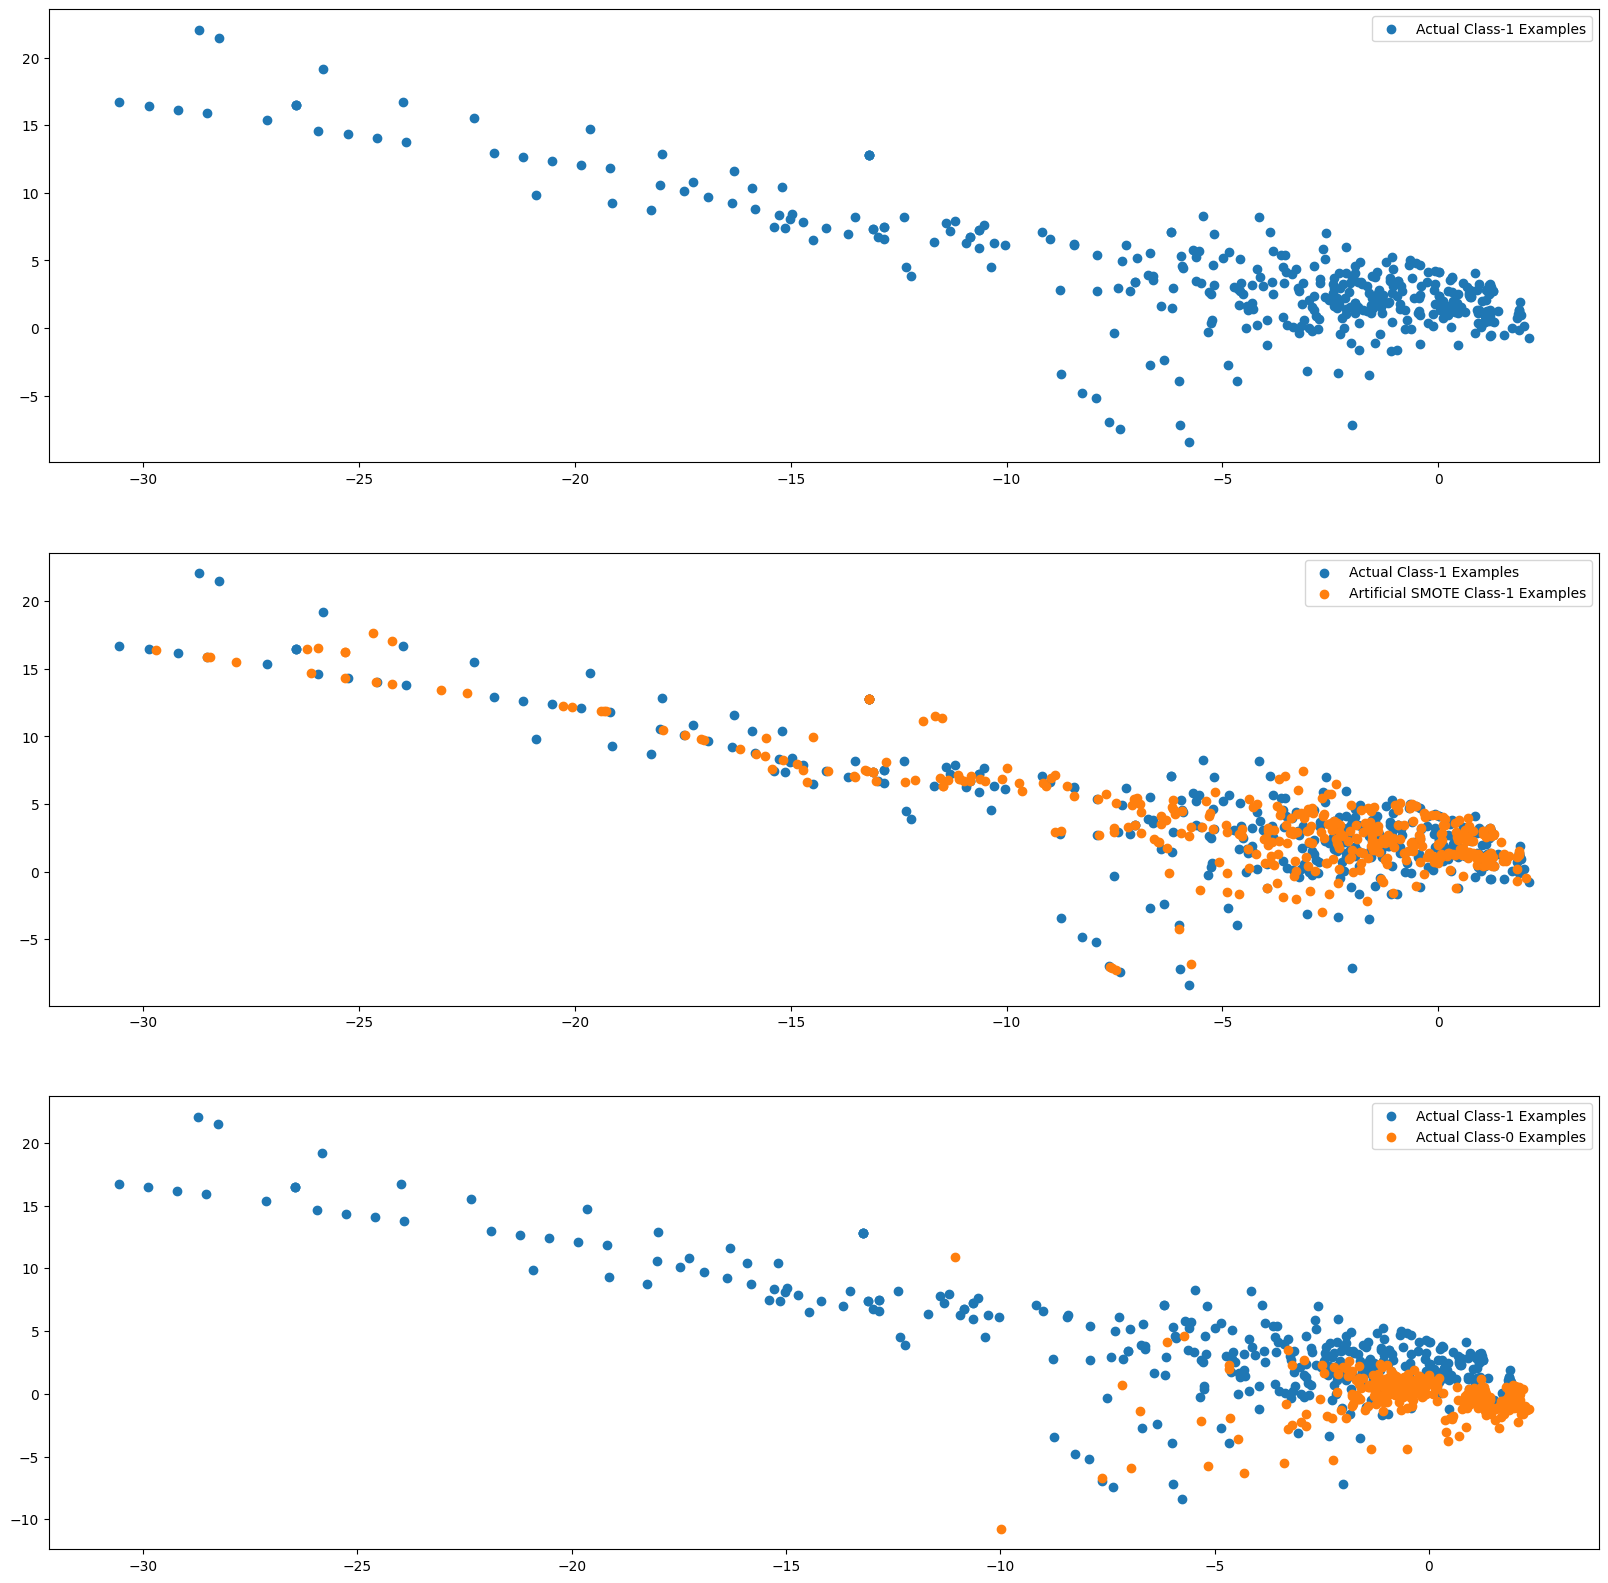

In [11]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from imblearn import over_sampling

warnings.filterwarnings("ignore")

# Apply SMOTE
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Extract artificial minority class samples
X_train_smote_1 = X_train_smote.to_numpy()[X_train.shape[0]:]  

# Extract actual class-1 and class-0 examples
X_train_1 = X_train.to_numpy()[y_train.to_numpy() == 1] 
X_train_0 = X_train.to_numpy()[y_train.to_numpy() == 0]

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

### Exploring algorithms on balanced dataset by building models:

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
  

## Logistic Regression + SMOTE

In [22]:
from sklearn import model_selection   
from sklearn.model_selection import KFold

# Creating KFold object with 5 splits

folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifying params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,                         
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        scoring= 'roc_auc') 

# Fitting the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [23]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.316676,0.201975,0.043495,0.004879,0.01,{'C': 0.01},0.991691,0.991724,0.991648,0.991800,...,0.991848,0.000268,1,0.991649,0.991629,0.991998,0.991960,0.992062,0.991860,0.000183
1,3.073592,0.073983,0.043196,0.010981,0.10,{'C': 0.1},0.991917,0.990679,0.991629,0.991645,...,0.991532,0.000439,4,0.991889,0.990558,0.991966,0.991827,0.991416,0.991531,0.000522
2,3.019309,0.109655,0.047189,0.015950,1.00,{'C': 1},0.992089,0.990670,0.990464,0.991893,...,0.991346,0.000657,6,0.992063,0.990561,0.990834,0.992068,0.991236,0.991352,0.000621
3,3.174063,0.058012,0.043991,0.008833,10.00,{'C': 10},0.991678,0.991804,0.991541,0.991859,...,0.991777,0.000158,2,0.991638,0.991704,0.991906,0.992076,0.991667,0.991798,0.000168
4,3.125560,0.010532,0.044080,0.009072,100.00,{'C': 100},0.990894,0.991763,0.991145,0.991767,...,0.991525,0.000433,5,0.990836,0.991664,0.991513,0.991921,0.991731,0.991533,0.000373
5,3.069236,0.058962,0.045643,0.017318,1000.00,{'C': 1000},0.992058,0.990925,0.991734,0.991819,...,0.991755,0.000451,3,0.992023,0.990814,0.992084,0.991958,0.991904,0.991757,0.000475


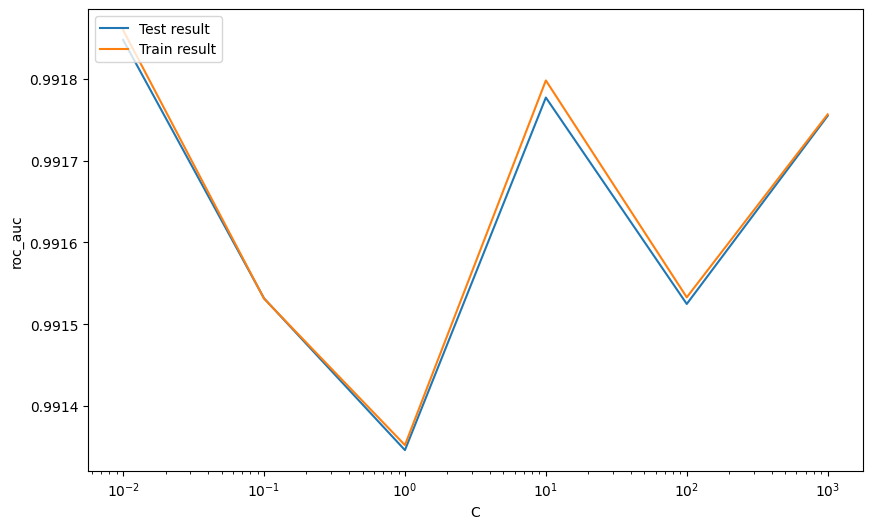

In [24]:
# plotting of C vs train and validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])

plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [25]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

0.9918476183585685
0.01
The highest test roc_auc is 0.9721905341770372 at C = 0.01


### on the Train set (Logistic Regression)

In [28]:
# Instantiating the model with best C
logistic_bal_smote = LogisticRegression(C=0.01)

# Fitting the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223421   4030]
 [ 13228 214223]]


In [29]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

# classification_report
print(classification_report(y_train_smote, y_train_pred))

Accuracy:- 0.9620621584429174
Sensitivity:- 0.9418424188066881
Specificity:- 0.9822818980791467
F1-Score:- 0.9612792346490047
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227451
           1       0.98      0.94      0.96    227451

    accuracy                           0.96    454902
   macro avg       0.96      0.96      0.96    454902
weighted avg       0.96      0.96      0.96    454902



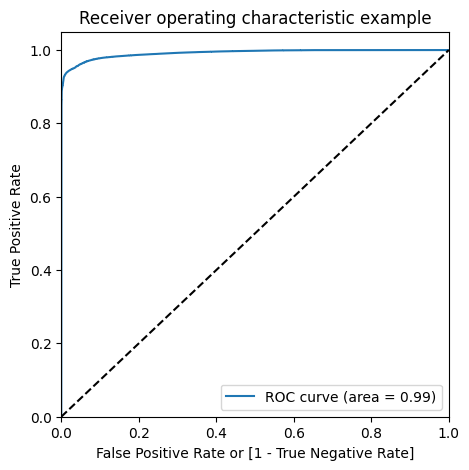

In [30]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

# Plotting the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

###  on the test set (Logistic Regression)


[[55879   985]
 [   15    83]]

Accuracy:- 0.9824444366419718
Sensitivity:- 0.8469387755102041
Specificity:- 0.9826779684862127
F1-Score:- 0.1423670668953688

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.85      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962





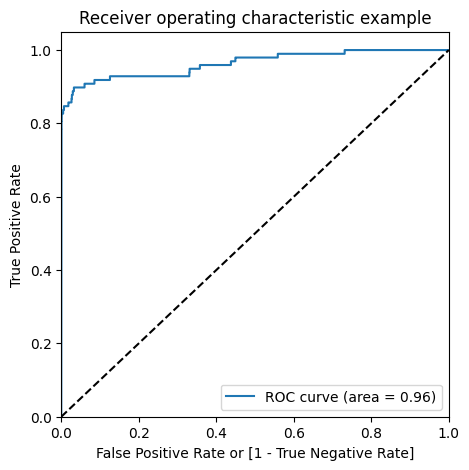

In [32]:
y_test_pred = logistic_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print('')


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives   

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))
print('')


# classification_report
print(classification_report(y_test, y_test_pred))
print('')


# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]


# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc
print('')


# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)

## XGBoost + SMOTE

In [94]:
# hyperparameter tuning &  creating a KFold object 
folds = 3

# specifying the range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.6, 0.9]}          


# creating model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# setting up GridSearchCV
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model_cv
model_cv.fit(X_train_smote, y_train_smote)   

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [95]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.546763,0.046810,0.089087,0.002245,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999829,0.999767,0.999841,0.999812,0.000032,3,0.999849,0.999825,0.999826,0.999833,0.000011
1,2.785442,0.374968,0.108664,0.011697,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999807,0.999776,0.999839,0.999807,0.000026,4,0.999836,0.999835,0.999831,0.999834,0.000002
2,3.667587,0.177516,0.122022,0.001589,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999963,0.999948,0.999984,0.999965,0.000014,1,0.999989,0.999985,0.999986,0.999987,0.000002
3,3.589401,0.067325,0.122989,0.001008,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999965,0.999945,0.999984,0.999965,0.000016,2,0.999985,0.999992,0.999988,0.999989,0.000003


In [96]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [97]:
# chosen hyperparameters,  'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

###  on the Train set (XGBoost)

In [98]:

y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)



[[227451      0]
 [     0 227451]]


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

# classification_report
print(classification_report(y_train_smote, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



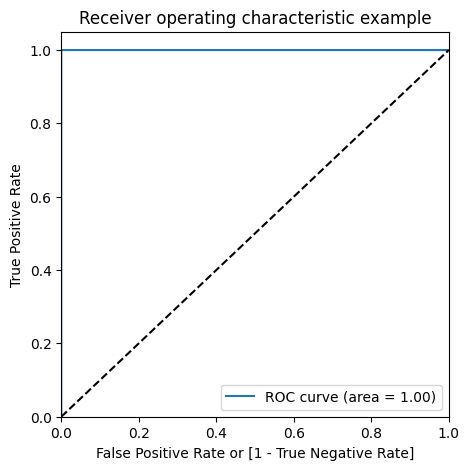

In [100]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

### on Test set (XGBoost)

In [101]:
y_test_pred = xgb_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56843    21]
 [   18    80]]


In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report


# Extract TP, TN, FP, FN
TP = confusion[1, 1]  # True positives
TN = confusion[0, 0]  # True negatives
FP = confusion[0, 1]  # False positives
FN = confusion[1, 0]  # False negatives

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall)
print("Sensitivity:", TP / float(TP + FN))

# Specificity
print("Specificity:", TN / float(TN + FP))

# F1 Score (for test set)
print("F1-Score:", f1_score(y_test, y_test_pred))

# Classification Report (for test set)
print(classification_report(y_test, y_test_pred))


Accuracy: 0.9993153330290369
Sensitivity: 0.8163265306122449
Specificity: 0.9996306978052898
F1-Score: 0.8040201005025126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [111]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9623010290216255

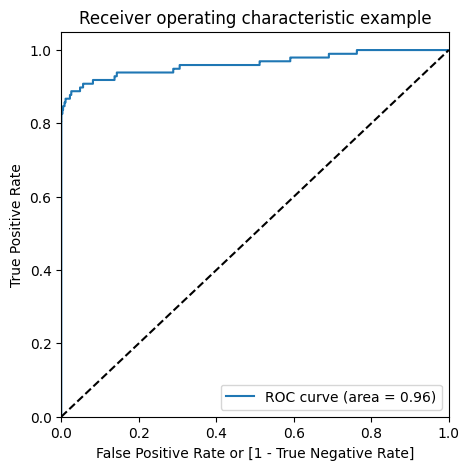

In [112]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Decision Tree + SMOTE

In [113]:
# Creating the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the Grid search model

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           scoring= 'roc_auc')

# Fitting the grid search

grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [114]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.482499,0.105464,0.064984,0.004753,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989101,0.987745,0.988377,0.988408,0.000554,8
1,9.046053,0.155714,0.063854,0.002103,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989101,0.987745,0.988416,0.988421,0.000553,5
2,9.007749,0.143132,0.059718,0.003335,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.989120,0.987710,0.988407,0.988412,0.000576,6
3,8.811026,0.078136,0.065211,0.004546,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.989119,0.987712,0.988395,0.988409,0.000574,7
4,16.896556,0.431015,0.068126,0.003024,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998540,0.998076,0.998239,0.998285,0.000192,2
5,16.709013,0.350850,0.064495,0.006611,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998515,0.998103,0.998318,0.998312,0.000168,1
6,16.385039,0.322837,0.068678,0.000544,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998534,0.997946,0.998219,0.998233,0.000240,4
7,17.388339,0.445059,0.062491,0.005686,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998598,0.997941,0.998275,0.998272,0.000268,3


In [115]:
# Optimal Sensitivity Score & Hyperparameters

print("Best roc auc: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc:  0.9983121218849901
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [116]:
# Initializing the Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 75,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=75)

### on the Train Set (Decision Tree)

In [117]:
# Predictions
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

# Classification_report
print(classification_report(y_train_smote, y_train_pred))

[[224366   3085]
 [  1634 225817]]
Accuracy:- 0.9896263371011779
Sensitivity:- 0.992816035102066
Specificity:- 0.9864366391002898
F1-Score:- 0.989659320745125
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



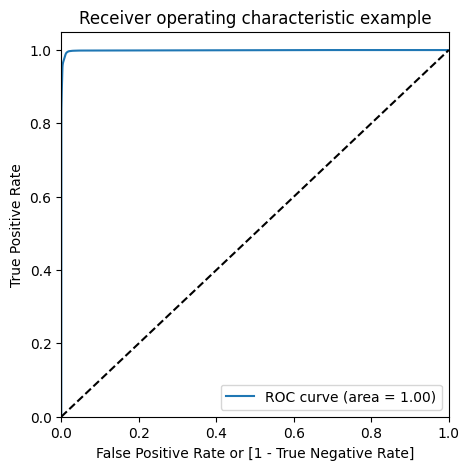

In [118]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plotting the ROC Curve
draw_roc(y_train_smote, y_train_pred_proba)


## on the test Set ( Decision Tree)

In [119]:
y_test_pred = dt_bal_smote_model.predict(X_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print (' ')

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))
print (' ')

# classification_report
print(classification_report(y_test, y_test_pred))



[[56080   784]
 [   19    79]]
 
Accuracy:- 0.9859028826235033
Sensitivity:- 0.8061224489795918
Specificity:- 0.9862127180641531
F1-Score:- 0.16441207075962538
 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.81      0.16        98

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.58     56962
weighted avg       1.00      0.99      0.99     56962



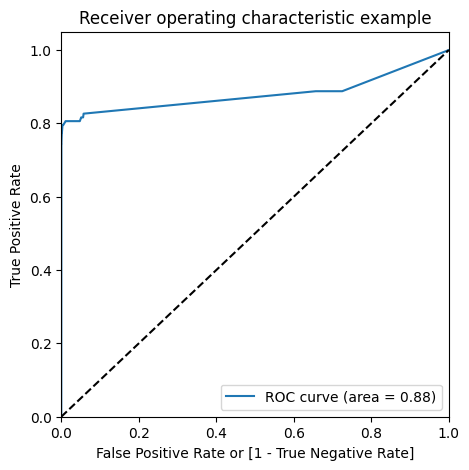

In [120]:
# Predicted Probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

# roc auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# PlotING the ROC Curve
draw_roc(y_test, y_test_pred_proba)

## AdaSYn ( Adaptive Sythetic Sampling)

In [122]:
# importing libs & initiating model
from imblearn.over_sampling import ADASYN
from collections import Counter

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Sampling Class Distribution Comparison
print('Before the sampling class :-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before the sampling class :- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227395})


### Print the class distribution after applying ADASYN

## Logistic Regression + ADASYN

In [123]:
# Creating KFold object with 3 splits

folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specifying params
params = {"C": [1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [124]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.817106,0.103504,0.083487,0.001718,1,{'C': 1},0.982384,0.980441,0.982503,0.981776,0.000945,2,0.982809,0.979922,0.982528,0.981753,0.001300
1,2.902998,0.104440,0.071336,0.003057,10,{'C': 10},0.978925,0.982919,0.980974,0.980940,0.001631,4,0.979354,0.982521,0.981064,0.980980,0.001294
2,2.834888,0.139330,0.082645,0.012371,100,{'C': 100},0.981853,0.982872,0.982499,0.982408,0.000421,1,0.982308,0.982467,0.982534,0.982437,0.000095
3,2.769432,0.058120,0.082234,0.017193,1000,{'C': 1000},0.980319,0.982940,0.981329,0.981529,0.001080,3,0.980784,0.982539,0.981405,0.981576,0.000727


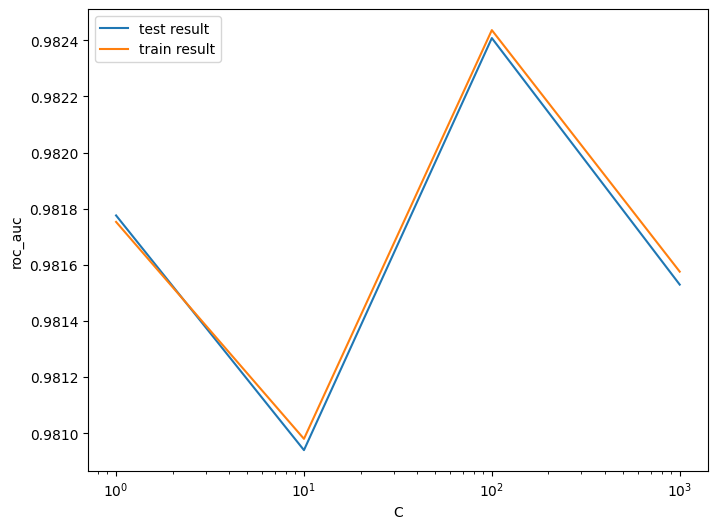

In [125]:
# ploting the  C vs train & validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])

plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [126]:
# best model

print(model_cv.best_score_)
print(model_cv.best_params_)

0.982408158625149
{'C': 100}


In [128]:
# Instantiating the model with best C
logistic_bal_adasyn = LogisticRegression(C=100)
# Fitting the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

### on train Set (Linear Regression)

[[215777  11674]
 [ 21447 205948]]

Accuracy:- 0.9271819472964475
Sensitivity:- 0.9056839420391829
Specificity:- 0.9486746595970121
F1-Score:- 0.925573629771447

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    227451
           1       0.95      0.91      0.93    227395

    accuracy                           0.93    454846
   macro avg       0.93      0.93      0.93    454846
weighted avg       0.93      0.93      0.93    454846






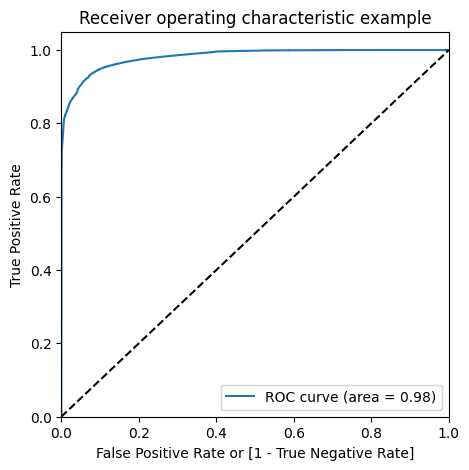

In [130]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('')
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))
print('')

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

print('')

# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]
print('')

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc
print('')

# Plotting the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

### on Test set (Linear Regression)

[[54004  2860]
 [   11    87]]

Accuracy:- 0.9495979775991011
Sensitivity:- 0.8877551020408163
Specificity:- 0.9497045582442318
F1-Score:- 0.05714285714285714

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.89      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962





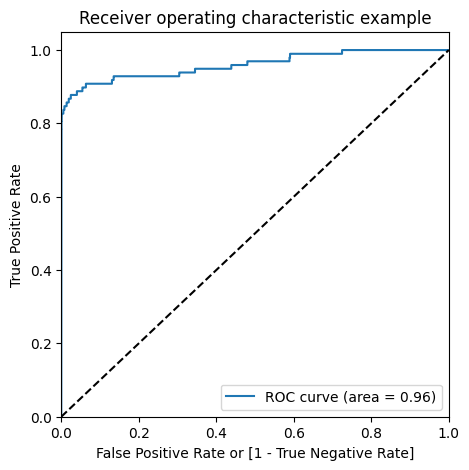

In [133]:
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print('')

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))
print('')

# classification_report
print(classification_report(y_test, y_test_pred))
print('')

# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc
print('')

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)



## XGBoost + ADASYN

In [134]:
# creating 3 KFold object 
folds = 3

# specifying the range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6]}          

# Initiating the model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Setting up the GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [135]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.473742,0.052467,0.097394,0.004047,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999236,0.998988,0.991668,0.996631,0.003511,3,0.999658,0.999702,0.999756,0.999705,0.000040
1,2.530519,0.047066,0.092207,0.005659,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999164,0.999055,0.992688,0.996969,0.003027,2,0.999633,0.999711,0.999751,0.999698,0.000049
2,2.399732,0.041895,0.090159,0.004292,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999754,0.999730,0.989438,0.996307,0.004857,4,0.999976,0.999987,0.999968,0.999977,0.000008
3,2.435236,0.155355,0.094192,0.000828,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999844,0.999811,0.993745,0.997800,0.002868,1,0.999975,0.999978,0.999974,0.999976,0.000002


In [136]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [137]:
# with the best hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fitting model on the  training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

### on Train Set (XGBoost)

[[227451      0]
 [     0 227395]]

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227395

    accuracy                           1.00    454846
   macro avg       1.00      1.00      1.00    454846
weighted avg       1.00      1.00      1.00    454846





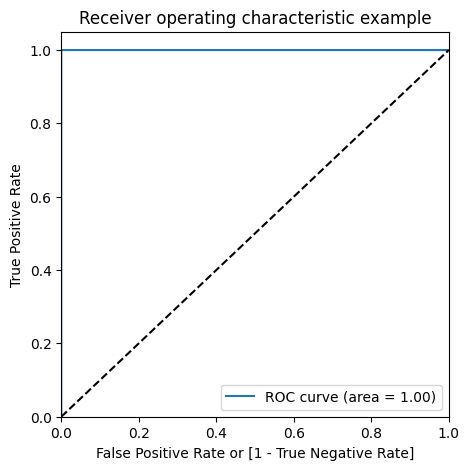

In [138]:
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)
print('')

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))
print('')

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))
print('')

# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc
print('')

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

### on Test Set

[[56842    22]
 [   18    80]]

Accuracy:- 0.9992977774656788
Sensitivity:- 0.8163265306122449
Specificity:- 0.999613111986494
F1-Score:- 0.8

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962




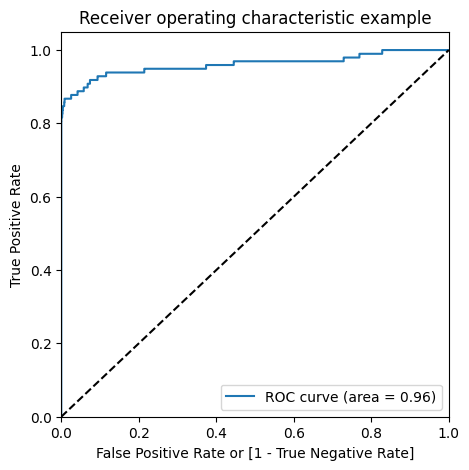

In [139]:
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
print('')

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))
print('')

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc
print('')

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Decision Tree + ADASYN

In [140]:
# Creating the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [141]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.707248,0.068045,0.060898,0.006568,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.975652,0.961317,0.954563,0.963844,0.008793,7
1,9.386615,0.423725,0.062655,0.004031,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.975651,0.961308,0.953094,0.963351,0.009322,8
2,9.642353,0.254466,0.060564,0.005535,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.975710,0.961533,0.954578,0.963940,0.008793,5
3,9.465809,0.092193,0.061351,0.005567,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.975669,0.961532,0.954576,0.963926,0.008776,6
4,17.275278,0.403658,0.071951,0.004900,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.985149,0.981684,0.953416,0.973416,0.014213,3
5,17.143240,0.622239,0.071545,0.003802,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.985725,0.980830,0.951060,0.972538,0.015318,4
6,16.945388,0.313333,0.070018,0.001984,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.987099,0.980567,0.960558,0.976074,0.011292,2
7,17.495484,0.030820,0.068562,0.004741,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.987053,0.978736,0.964568,0.976786,0.009282,1


In [142]:
print(grid_search.best_score_)

grid_search.best_estimator_

0.9767855059597931


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [143]:
# Creating the Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

### on Train Set (Decision Tree)

[[222147   5304]
 [  1644 225751]]

Accuracy:- 0.9847245001604938
Sensitivity:- 0.9927702895842037
Specificity:- 0.9766806916654576
F1-Score:- 0.9848445850147235

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    227451
           1       0.98      0.99      0.98    227395

    accuracy                           0.98    454846
   macro avg       0.98      0.98      0.98    454846
weighted avg       0.98      0.98      0.98    454846





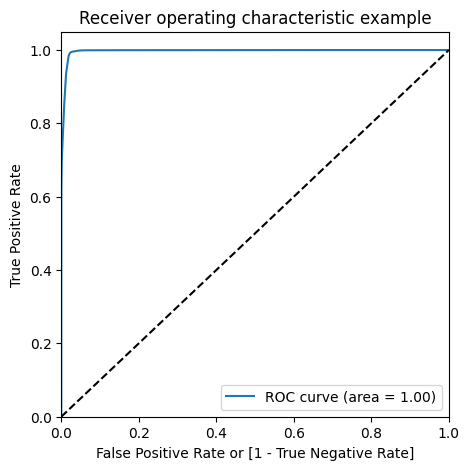

In [144]:
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)
print('')

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))
print('')

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))
print('')

# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]


# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc
print('')

# Plotting the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)


### on the Test Set (Decision Tree)

[[55527  1337]
 [   18    80]]
Accuracy:- 0.9762122116498718
Sensitivity:- 0.8163265306122449
Specificity:- 0.9764877602701182
F1-Score:- 0.10561056105610561

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



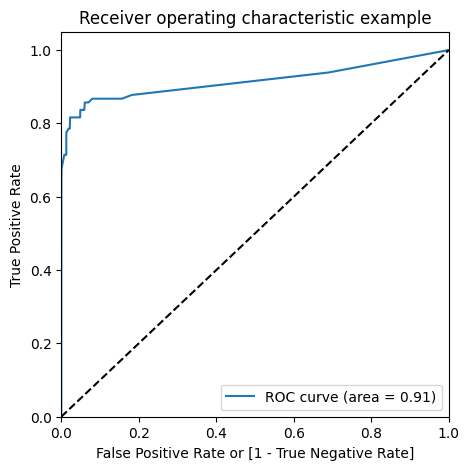

In [145]:
y_test_pred = dt_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))
print('')

# classification_report
print(classification_report(y_test, y_test_pred))


# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]


# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Print the FPR,TPR & select the best threshold from the roc curve

In [154]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9917897787384077
Threshold= 0.5557810187283739



1. Imbalanced Data (No Sampling Technique Applied)
|  | IMBALANCED          | Accuracy | Senstivity | Specificity | F1-Score | ROC Curve |
|  | Logistic Regression | 0.99     | 0.68       | 0.99        | 0.7      | 0.94      |
|  | XGBoost             | 0.99     | 0.76       | 0.99        | 0.86     | 0.97      |
|  | Decision Tree       | 0.99     | 0.69       | 0.99        | 0.73     | 0.93      |
|  | Random Forest       | 0.94     | 0.88       | 0.94        | 0.05     | 0.95      |

Analysis:

XGBoost performs the best in terms of Sensitivity (Recall) and F1-Score, which are crucial for fraud detection (as we want to maximize the detection of fraudulent transactions).
Random Forest has a high Sensitivity but a very low F1-Score, indicating poor precision.

2. SMOTE (Synthetic Minority Oversampling Technique)
|  | SMOTE               | Accuracy | Senstivity | Specificity | F1-Score | ROC Curve |
|  | Logistic Regression | 0.98     | 0.84       | 0.98        | 0.14     | 0.96      |
|  | XGBoost             | 0.99     | 0.82       | 0.99        | 0.8      | 0.96      |
|  | Decision Tree       | 0.98     | 0.81       | 0.99        | 0.16     | 0.88      |

Analysis:

XGBoost again excels with a sensitivity of 0.82 and an F1-score of 0.8. It also has a ROC curve of 0.96, which is very strong.
Logistic Regression has a high sensitivity (0.84) but its F1-score is low (0.14), which indicates a severe imbalance between precision and recall.
Decision Tree has a sensitivity of 0.81, which is decent, but its F1-score is low (0.16), suggesting issues with precision.

3. AdaSYN (Adaptive Synthetic Sampling)
|  | SMOTE               | Accuracy | Senstivity | Specificity | F1-Score | ROC Curve |
|  | Logistic Regression | 0.94     | 0.89       | 0.95        | 0.058    | 0.96      |
|  | XGBoost             | 0.99     | 0.82       | 0.99        | 0.8      | 0.96      |
|  | Decision Tree       | 0.97     | 0.81       | 0.97        | 0.11     | 0.91      |




Key Observations:

XGBoost appears to perform the best across all metrics, particularly with ROC curve and F1-score.
Random Forest struggles with F1-score in the IMBALANCED dataset, but does well in Sensitivity.
Logistic Regression shows good Accuracy and Specificity but suffers in F1-score under all conditions.
SMOTE and AdaSyn balancing methods improve recall (Sensitivity) across most models, but the F1-score sometimes drops due to an imbalance between precision and recall.

In [7]:
df[df['Class']==1].Amount.mean()

122.21132113821139